## Creating Model for Deployment

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("datasets/Placement_Data_Full_Class.csv")

# Cek Data
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Examining Dataset

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<b>Keterangan</b>

Inference

<ul>
    <li>We have Gender and Educational qualification data</li>
    <li>We have all the educational performance(score) data</li>
    <li>We have the status of placement and salary details</li>
    <li>We can expect null values in salary as candidates who weren't placed would have no salary</li>
    <li>Status of placement is our target variable rest of them are independent variable except salary</li>
</ul>

In [5]:
print("The Shape of the Data is (row, column):" + str(data.shape))
print(data.info())

The Shape of the Data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [6]:
report = data.profile_report(title="Campus Placement Data - Report", progress_bar=False)

In [7]:
report

<b>Keterangan</b>

<ul>
<li>67 Missing values in Salary for students who didn't get placed. NaN Value needs to be filled.</li>
<li>Data is not scaled. Salary column ranges from 200k-940k, rest of numerical columns are percentages.</li>
<li>300k at 75th Percentile goes all the way up to 940k max, in Salary (high skewnwss). Thus, outliers at high salary end.</li>
</ul>

## Data Cleaning / Handling missing values

In [8]:
data["salary"].fillna(value = 0, inplace=True)

print("Salary Column with null values:",
      data["salary"].isnull().sum(), sep = "\n"
     )

Salary Column with null values:
0


## Exploring Data by each Features (Optional)

In [9]:
# Feature = Gender
# Does gender affect placements

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

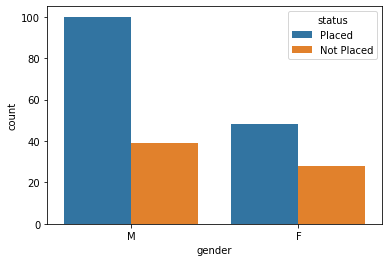

In [10]:
sns.countplot("gender", hue="status", data=data)
plt.show();

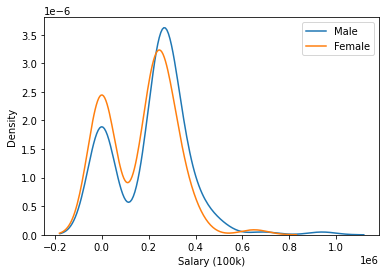

In [11]:
sns.kdeplot(data.salary[data.gender == "M"])
sns.kdeplot(data.salary[data.gender == "F"])

plt.legend(["Male", "Female"])

plt.xlabel("Salary (100k)")
plt.show()

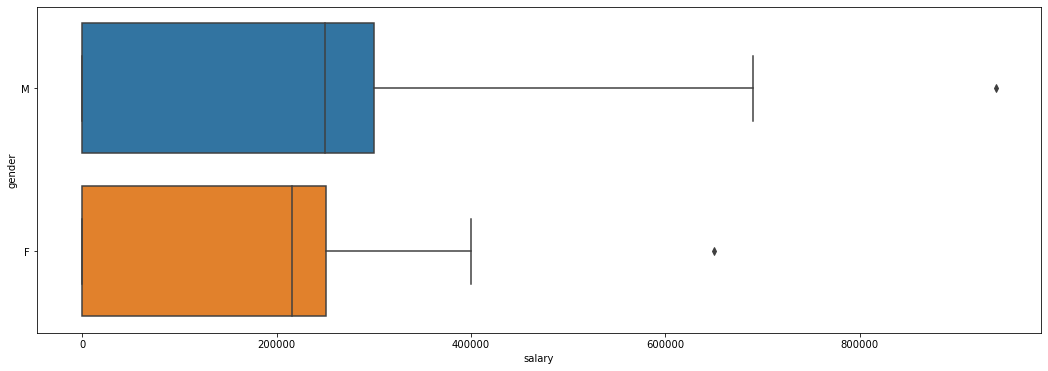

In [12]:
plt.figure(figsize=(18, 6))

sns.boxplot("salary", "gender", data=data)
plt.show()

<b>Keterangan</b>

Insights

<ul>
<li>We have samples of 139 Male studets and 76 Female students.</li>
<li>30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.</li>
<li>Male students are offered slightly greater salary than female on an average.</li>
</ul>

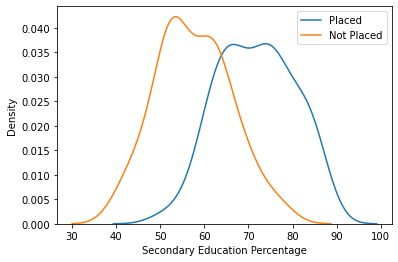

In [13]:
sns.kdeplot(data.ssc_p[data.status == "Placed"])
sns.kdeplot(data.ssc_p[data.status == "Not Placed"])

plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

<b>Keterangan</b>

<ul>
<li>All students with Secondary Education Percentage above 90% are placed</li>
<li>All students with Secondary Education Percentage below 50% are not-placed</li>
<li>Students with good Secondary Education Percentage are placed on average.</li>
</ul>

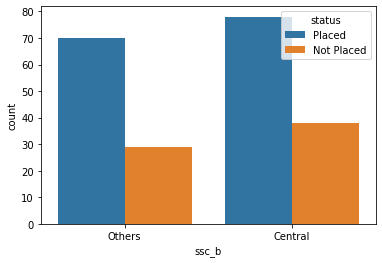

In [14]:
sns.countplot("ssc_b", hue="status", data = data)
plt.show()

<b>Keterangan</b>

Board Of Education tidak banyak mempengaruhi Placement Status.

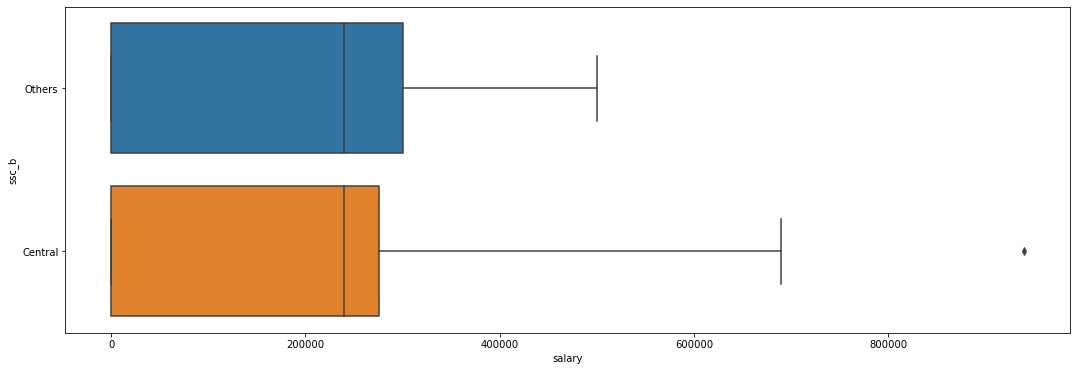

In [15]:
plt.figure(figsize=(18, 6))
sns.boxplot("salary", "ssc_b", data=data)

plt.show()

<b>Keterangan</b>

Outliers terdapat pada keduanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.

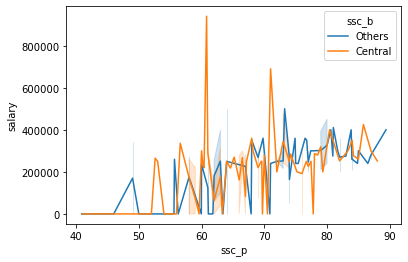

In [16]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

<b>Keterangan</b>

<p>Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education Tidak Mempengaruhi Gaji<br><br>Kita dapat membuat grafik sendiri dari sini.</p>

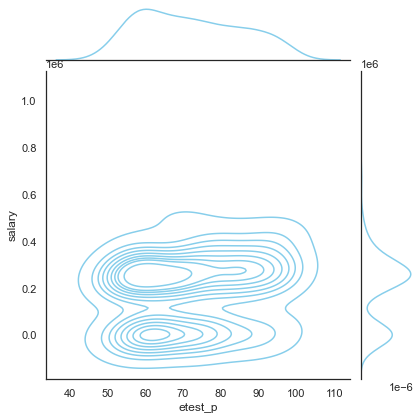

In [17]:
sns.set(rc = {"figure.figsize":(12, 8)})
sns.set(style="white", color_codes = True)
sns.jointplot(x = data["etest_p"], y = data["salary"], kind = "kde", color = "skyblue")

plt.show()

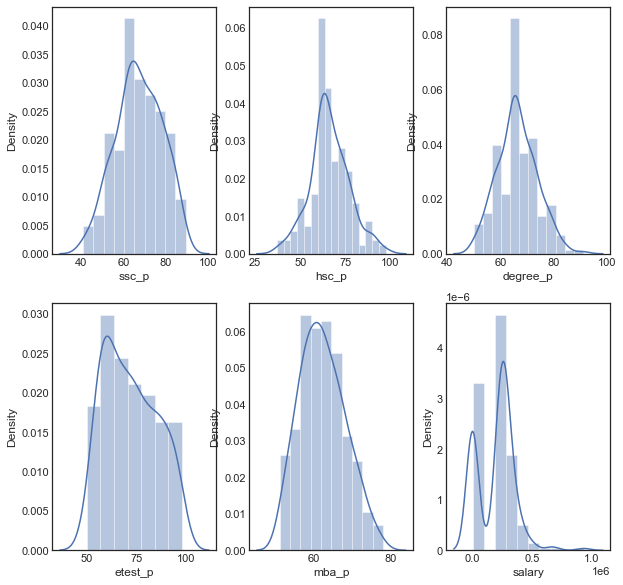

In [18]:
plt.figure(figsize=(15, 7))
plt.style.use("seaborn-white")
plt.subplot(231)
sns.distplot(data["ssc_p"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(232)
sns.distplot(data["hsc_p"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(233)
sns.distplot(data["degree_p"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(234)
sns.distplot(data["etest_p"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(235)
sns.distplot(data["mba_p"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(236)
sns.distplot(data["salary"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

<b>Keterangan</b>

<ul>
<li>All the distributions follow normal distribution except salary feature</li>
<li>Most of the candidates educational performances are between 60-80%</li>
<li>Salary distribution got outliers where few have got salary of 7.5L and 10L PA</li>
</ul>

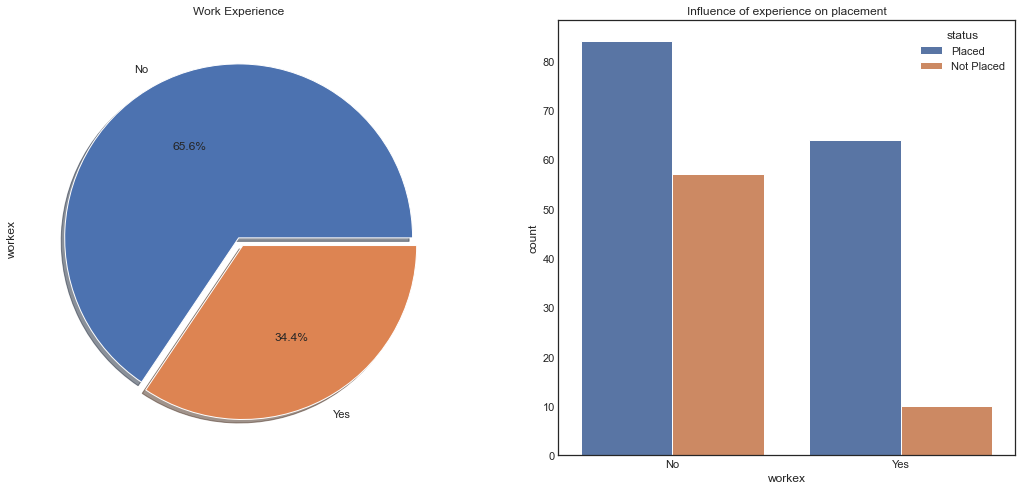

In [19]:
plt.style.use("seaborn-white")

f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title("Work Experience")
sns.countplot(x = "workex", hue = "status", data = data)

ax[1].set_title("Influence of experience on placement")
plt.show()

<b>Keterangan</b>

<ul>
<li>We have nearly 66.2% of candidates who never had any work experience</li>
<li>Candidates who never had work experience have got hired more than the ones who had experience</li>
<li>We can conclude that work experience doesn't influence a candidate in the recruitment process</li>
</ul>

## Preprocessing data for classfication models

In [20]:
from sklearn.preprocessing import LabelEncoder

object_cols = ["gender", "workex", "specialisation", "status"]

label_encorder = LabelEncoder()
for col in object_cols:
    data[col] = label_encorder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [21]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Seperating Features and Target
X = data[["ssc_p", "hsc_p", "degree_p", "etest_p"]]
y = data["status"]

In [23]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [24]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion = "entropy")
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [25]:
# Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [26]:
# Using Logistic Regression

LogR = LogisticRegression(solver="lbfgs")
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



## Getting Ready for Deployment

### Pickle

<p style="text-align:justify">Modul pickle Python digunakan untuk serializing dan de-serializing struktur objek Python. Objek apa pun dengan Python dapat dibuat pickled sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah 'serializes' objek terlebih dahulu sebelum menulisnya ke file. Pickling adalah cara untuk mengubah objek python (list, dict, etc.) Menjadi character stream. Idenya adalah bahwa character stream ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.
    </p>

In [27]:
pickle.dump(random_forest, open("model_classifier.pkl", "wb"))

## Creating web app with Flask

In [28]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "Hello, World!"

<b>Keterangan</b>

Jadi apa yang dilakukan kode tersebut?

<ul>
<li>Pertama kita mengimpor kelas <code>Flask</code>. Instance dari kelas ini adalah aplikasi WSGI kita.</li>
<li>Selanjutnya kita membuat instance dari kelas ini. Argumen pertama adalah nama modul atau paket aplikasi. Jika kita menggunakan satu modul (seperti dalam contoh ini), kita harus menggunakan <code>__name__</code> karena bergantung pada apakah aplikasi tersebut dimulai sebagai aplikasi atau diimpor sebagai modul, namanya akan berbeda (<code>'__main__'</code> versus nama impor sebenarnya). Ini diperlukan agar Flask tahu di mana mencari templates, static files, dan lain-lain.</li>
<li>Kita kemudian menggunakan dekorator <code>route()</code> untuk memberi tahu Flask, URL apa yang harus mentrigger fungsi kita.</li>
<li>Fungsi tersebut diberi nama yang juga digunakan untuk menghasilkan URL untuk fungsi tertentu itu, dan mengembalikan pesan yang ingin kita tampilkan di browser pengguna.</li>
</ul>

<p>Simpan sebagai <code>hello.py</code> atau yang serupa. Pastikan untuk tidak memanggil aplikasi kita <code>flask.py</code> karena ini akan conflict dengan Flask itu sendiri.<br><br>Untuk menjalankan aplikasi, kita dapat menggunakan perintah flask atau switch -m python dengan Flask. Sebelum kita dapat melakukannya, kita perlu memberi tahu terminal tentang aplikasi yang akan digunakan dengan mengekspor FLASK_APP environment variable:</p>

### Run Flask

In [29]:
# set FLASK_APP=hello.py
# flask run

### Debug Mode

<b>Keterangan</b>

<p>Script flask sangat bagus untuk memulai server local development, tetapi kita harus merestart secara manual setelah setiap perubahan pada kode kita. Hal itu tidak bagus dan Flask bisa melakukannya dengan lebih baik. Jika kita mengaktifkan debug support, server akan merestart dirinya sendiri pada perubahan kode, dan itu juga akan memberi kita debugger yang berguna jika terjadi kesalahan.<br><br>Untuk mengaktifkan semua fitur development (termasuk mode debug) kita dapat mengekspor <code>FLASK_ENV</code> environment variable dan menyetelnya ke <code>development</code> sebelum menjalankan server:</p>

In [30]:
# set FLASK_ENV=development
# flask run

<b>Keterangan</b>

Hal tersebut melakukan hal-hal berikut:

<ul>
<li>it activates the debugger</li>
<li>it activates the automatic reloader</li>
<li>it enables the debug mode on the Flask application.</li>
</ul>

<p>Kita juga dapat mengontrol mode debug secara terpisah dari environment dengan mengekspor <code>FLASK_DEBUG=1</code>.</p>

### Routing

<b>Keterangan</b>

<p>Aplikasi web modern menggunakan URL yang meaningful untuk membantu pengguna. Pengguna lebih cenderung menyukai halaman dan kembali jika halaman tersebut menggunakan URL yang meaningful yang dapat mereka ingat dan gunakan untuk mengunjungi halaman secara langsung.<br><br>Gunakan dekorator <code>route()</code> untuk mengikat fungsi ke URL.</p>

In [31]:
@app.route("/")
def index():
    return "Index Page"

@app.route("/hello")
def hello():
    return "Hello, World!"

### Variable Rules

<b>Keterangan</b>

<p>Kita dapat menambahkan bagian variabel ke URL dengan menandai bagian dengan <code>&lt;variable_name&gt;</code>. Fungsi kita kemudian menerima masukan sebagai keyword argument. Secara opsional, kita &nbsp;bisa menggunakan konverter untuk menentukan tipe argumen seperti <code>&lt;converter:variable_name&gt;</code>.</p>

In [32]:
from markupsafe import escape

@app.route("/user/<username>")
def show_user_profile(username):
    # Show the user profile for that user
    return "User %s" % escape(username)

@app.route("/post/<int:post_id>")
def show_post(post_id):
    # Show the post with the given id, the id is an integer
    return "Post %d" % post_id

@app.route("/user/<path:subpath>")
def show_supbath(subpath):
    # Show the subpath after /path/
    return "Subpath %s" % escape(subpath)

### HTTP Methods

<b>Keterangan</b>

<p>Aplikasi web menggunakan metode HTTP yang berbeda saat mengakses URL. Kita harus membiasakan diri dengan metode HTTP saat kita bekerja dengan Flask. Secara default, route hanya menjawab permintaan <code>GET</code> . Kita bisa menggunakan argumen metode dekorator <code>route()</code>&nbsp; untuk menangani metode HTTP yang berbeda.</p>

In [33]:
from flask import request

@app.route("/login", methods=["GET", "POST"])
def login():
    if request.method == "POST":
        return do_the_login()
    else:
        return show_the_login_form()

### Static Files

<b>Keterangan</b>

<p>Aplikasi web dinamis juga membutuhkan file statis. Biasanya dari situlah file CSS dan JavaScript berasal. Idealnya server web kita dikonfigurasi untuk menyajikannya untuk kita , tetapi selama pengembangan, Flask juga dapat melakukannya. Cukup buat folder bernama static dalam paket kita atau di sebelah modul kita dan itu akan tersedia di /static pada aplikasi.<br><br>Untuk menghasilkan URL untuk file statis, gunakan endpoint name 'static':</p>

<p><code>url_for('static', filename='style.css')</code></p>

<p>File harus disimpan di sistem file sebagai static/style.css.</p>

### Rendering Templates

<b>Keterangan</b>

<p>Membuat HTML dari dalam Python tidaklah menyenangkan, dan sebenarnya cukup rumit karena kita harus melakukan HTML escaping sendiri untuk menjaga keamanan aplikasi. Karena itu Flask mengkonfigurasi template engine Jinja2 untuk kita &nbsp;secara otomatis.<br><br>Untuk merender template kita bisa menggunakan metode <code>render_template()</code>. Yang harus kita lakukan adalah memberikan nama template dan variabel yang ingin kita teruskan ke template engine sebagai keyword arguments. Berikut adalah contoh sederhana tentang cara merender template:</p>

In [34]:
# from flask import render_template

# @app.route("/hello/")
# @app.route("/hello/<name>")
# def hello(name=None):
#     return render_template("hello.html", name=name)

<b>Keterangan</b>

Flask akan mencari templates di folder templates . Jadi, jika aplikasi kita adalah sebuah modul, folder ini berada di sebelah modul tersebut, jika itu sebuah paket, itu sebenarnya ada di dalam packagekita:

#### Case 1: a module:

In [35]:
# /application.py
# /templates
#     /hello.html

#### Case 2: a package:

In [36]:
# /application
#     /_init_.py
#     /templates
#         /hello.html

<b>Keterangan</b>

<p>Untuk template, kita dapat menggunakan template Jinja2.<br><br>Berikut ini contoh template:</p>

In [37]:
# <!doctype html>
# <title>Hello from Flask</title>
# {% if name %}
#     <h1>Hello {{ name }}!</h1>
# {% else %}
#     <h1>Hello, World!</h1>
# {% endif %}

### Make our own Flask

<b>Keterangan</b>

<p>Ada beberapa hal yang perlu kita kumpulkan untuk aplikasi web. Dua yang pertama adalah:</p>

<ul>
<li>The Python code that will load our model, get user input from a web form, do predictions, return results.</li>
<li>The HTML templates that flask with render. These allow the user to input their own data and will present the results.</li>
</ul>

Aplikasi kita pada awalnya akan memiliki struktur seperti ini:

In [38]:
# H8Deployment/
#     |--model
#     |   |__ model_classifier.pkl
#     |--static
#     |   |__ css
#     |        |__ style.css
#     |--templates/
#     |   |__ main.html
#     |--app.py

<b>Keterangan</b>

<ol>
<li><span style="font-size: 16px;">model — Ini berisi kode untuk Machine Learning kita.</span></li>
<li><span style="font-size: 16px;">app.py — Ini berisi Flask API yang menerima detail siswa melalui panggilan GUI atau API, menghitung nilai yang diprediksi berdasarkan model kita dan mengembalikannya.</span></li>
<li><span style="font-size: 16px;">template — Folder ini berisi template HTML (main.html) untuk memungkinkan pengguna memasukkan detail siswa dan menampilkan nilai prediksi.</span></li>
<li><span style="font-size: 16px;">static — Folder ini berisi folder css dengan file style.css yang memiliki stryleyang diperlukan untuk file main.html.</span></li>
</ol>

<p>Pertama-tama kita akan membuat <code>app.py</code> dan <code>main.html</code> yang sangat mendasar, untuk mendemonstrasikan cara kerja flask. Kita akan mengembangkannya nanti untuk menyesuaikan dengan kebutuhan kita.</p>

### app.py

<b>Keterangan</b>

<p>Ini adalah inti dari aplikasi web kita. app.py juga yang akan dijalankan di server Heroku, mengirimkan halaman web dan memproses masukan dari pengguna.<br><br>Dalam flask, URL dirutekan ke fungsi yang berbeda. Di sini, kita dapat melihat bahwa membuka URL dasar (mis. <a href="www.ardhiraka.com">www.ardhiraka.com</a>) akan memicu fungsi <code>main()</code>. Fungsi ini hanya menyajikan file <code>main.html</code>, yang lokasinya ditentukan saat aplikasi dibuat. Kita dapat mengatur semua jenis routes untuk logging in, displaying data atau lainnya.</p>

In [39]:
# import flask

# app = flask.Flask(__name__, template_folder="templates")

# @app.route("/")
# def main():
#     return(flask.render_template("main.html"))
# if __name__ == "__main__":
#     app.run()

### app.py

<b>Keterangan</b>

<p>Untuk memulai flask di komputer lokal kita, pastikan kita berada di folder H8Deployment dan jalankan perintah: <code>python app.py</code>.<br><br>Hal ini akan meluncurkan aplikasi kita secara lokal, di <a href="http://127.0.0.1:5000/">http://127.0.0.1:5000/</a>.&nbsp;</p>

### Editing app.py to load the model

<b>Keterangan</b>

<p>Di bawah ini kita dapat melihat app.py yang dikembangkan. Dengan pickled model, kita tidak perlu mengimpor algoritme sklearn atau apa pun - kita hanya menetapkannya ke variabel - tetapi kita perlu mengimpor paket yang diperlukan. Perhatikan bahwa kita &nbsp;memuat model di bagian atas aplikasi. Artinya, ini hanya akan dimuat ke dalam memori satu kali di server saat kita menerapkannya, daripada dimuat setiap kali kami ingin membuat prediksi.</p>

In [40]:
# import numpy as np
# import pickle

# model = pickle.load(open("model/model_classifier.pkl", "rb"))

### Redirecting the API to predict the result

In [44]:
# @app.route('/predict',methods=['POST'])
# def predict():
#     '''
#     For rendering results on HTML GUI
#     '''
#     int_features = [int(x) for x in flask.request.form.values()]
#     final_features = [np.array(int_features)]
#     prediction = model.predict(final_features)

#     output = {0: 'not placed', 1: 'placed'}

#     return flask.render_template('main.html', prediction_text='Student must be {} to workplace'.format(output[prediction[0]]))


<b>Keterangan</b>

<p>Karena ini adalah request <code>POST</code> , ini akan membaca nilai input dari <code>request.form.values()</code>. Sekarang kita memiliki nilai input dalam variabel <code>int_features</code>, kita akan mengubahnya menjadi sebuah array dan kemudian menggunakan model untuk memprediksinya.<br><br>Saat kita mengklik tombol predict di main.html, dia akan memprediksi hasil untuk nilai yang dimasukkan oleh pengguna, kemudian meneruskan variabel <code>output</code> yang dikeluarkan dari model dan mengirimkannya kembali ke template <code>main.html</code> sebagai <code>prediction_text</code>.<br><br>Dalam kasus ini, kita perlu membuat aplikasi Flask kita dapat di-debug sehingga kita dapat dengan mudah memperbaikinya ketika masalah datang.<br><br>Tambahkan <code>debug=True</code> di <code>app.run</code>.</p>

In [42]:
# if __name__ == "__main__":
#     app.run(debug=True)

### Editing the main.html template

<b>Keterangan</b>

Template perlu dikembangkan dengan form. Kode HTML untuk ini ada di bawah.

Komponen penting:

#### The form

In [46]:
# <form action="{{ url_for('predict') }}" method="post">

<b>Keterangan</b>

<p>Atribut <code>action</code> memberi tahu flask route mana harus dipanggil ketika form disubmit. Dalam aplikasi sederhana ini, kita hanya menginginkan main function . Metode <code>POST</code> memberi tahu fungsi itu bahwa ia harus mengharapkan input dan setelahnya memprosesnya.</p>

#### Some input checks

<b>Keterangan</b>

<p>Saat kita bekerja dengan model kita sendiri, kita tidak cenderung melakukan hal-hal seperti menekan keyboard secara acak untuk memasukkan data. Tapi mungkin orang lain akan melakukannya. Jadi, yang terbaik adalah memastikan masukannya sesuai dengan yang kita harapkan. Oleh karena itu, elemen <code>&lt;input&gt;</code> dari form memiliki atribut <code>required</code>, untuk menjadikannya wajib.</p>

In [47]:
# <input type="text" name="ssc" placeholder="Secondary Education" required="required" />
# <input type="text" name="hsc" placeholder="Highschool" required="required" />
# <input type="text" name="degree" placeholder="Degree" required="required" />
# <input type="text" name="etest" placeholder="Interview Score" required="required" />

# <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>

#### The Results

<b>Keterangan</b>

<p>Placeholder <code>{{ prediction_text }}</code> yang kita lihat di sini adalah tempat prediksi keluaran kita dari model akan ditempatkan di file main.html kita.<br><br>Sekarang, file main.html kita akan terlihat seperti ini:</p>